In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "cmr10"
import random
np.random.seed(54)
# random.seed(4959)

In [2]:
def dist_function(x):
    f_x = np.sin(x)
    return f_x

In [3]:
def gen_data(x):
    f_x = dist_function(x)
    b = 0.4
    y = f_x + np.random.uniform(-b, b, len(x))
    sigma = 1/12*(2*b)**2
    return y, f_x, sigma

In [4]:
def get_rand_data(len_ratio, x, y, f_x):
    m = len(x)
    m_new = int(np.round(len_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)

    x1 = x[ind]
    y1 = y[ind]
    f_x1 = f_x[ind]

    return x1, y1, f_x1

/var/folders/c5/7wlx6j1x1td9t4gc2q05l3hc0000gn/T/ipykernel_25149/4032743163.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(1,len(p_order), figsize=(15, 1.5), dpi=120, facecolor='w', edgecolor='k')


bias:  [5.175457908229806, 4.772831464757426, 1.8056947313754266, 0.6034295294154238, 0.4918408098197758, 0.6770183842597803]
var:  [0.05311104175009657, 0.2292719517506148, 0.19505561828200707, 0.16316888447311176, 1.011636714254952, 22.19085324662747]


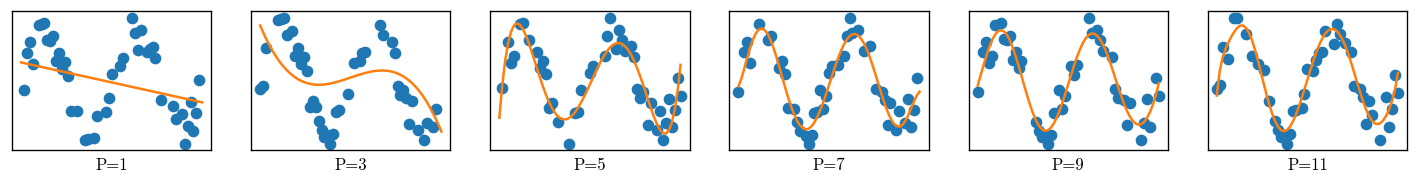

In [6]:
x_orig = np.arange(0, 4 * np.pi, .2)

y_orig, f_x_orig, sigma = gen_data(x_orig)
p_order = [1, 3, 5, 7, 9, 11]
num_data = 2000

f, ax = plt.subplots(1,len(p_order), figsize=(15, 1.5), dpi=120, facecolor='w', edgecolor='k')
t = np.arange(0.1, 4*np.pi, .2)
P=[]
bb=[]
vv=[]
for i, p_val in enumerate(p_order):
    exp_f_x = np.zeros(len(t))
    exp_f_x_plot = np.zeros(len(x_orig))
    var = np.zeros(len(t))
    for j in range(num_data):
        x, y, f_x = get_rand_data(0.7, x_orig, y_orig, f_x_orig)
        p = np.poly1d(np.polyfit(x, y, p_val))
        # ax[j, i].plot(x, y, 'o', t, p(x_orig), '-')
        P.append(p)
        exp_f_x = exp_f_x + p(t)
        exp_f_x_plot = exp_f_x_plot + p(x_orig)

    exp_f_x = exp_f_x/num_data
    exp_f_x_plot = exp_f_x_plot / num_data
    ax[i].plot(x, y, 'o', x_orig, exp_f_x_plot, '-')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    ax[i].set_xlabel('P='+str(p_order[i]))
    bias = np.linalg.norm(exp_f_x-dist_function(t))
    bb.append(bias)

    for j in range(num_data):
        p_t = P.pop(0)
        var = var + np.square(p_t(t)-exp_f_x)
    var = var/num_data
    variance = np.linalg.norm(var)
    vv.append(variance)


print("bias: ", bb)
print("var: ",vv)

/var/folders/c5/7wlx6j1x1td9t4gc2q05l3hc0000gn/T/ipykernel_25149/2607792456.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax1 = plt.subplots(dpi=100)
/var/folders/c5/7wlx6j1x1td9t4gc2q05l3hc0000gn/T/ipykernel_25149/2607792456.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax2 = ax1.twinx()


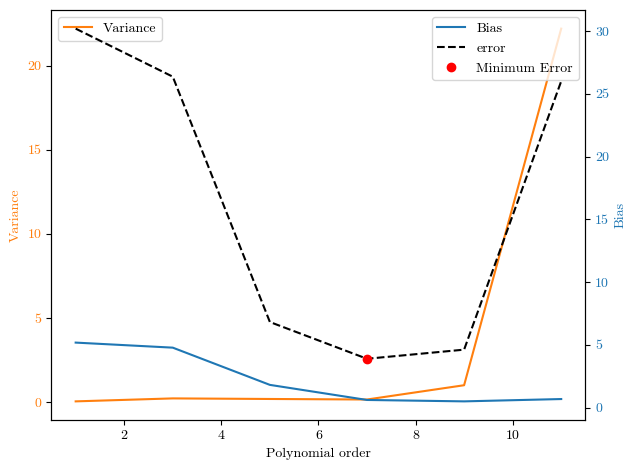

In [10]:
fig, ax1 = plt.subplots(dpi=100)

color = 'tab:orange'
ax1.set_xlabel('Polynomial order')
ax1.set_ylabel('Variance', color=color)
ax1.plot(p_order, vv, color=color, label = 'Variance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Bias', color=color)
ax2.plot(p_order, bb, color=color,  label = 'Bias')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

error = np.square(bb)+vv+sigma*len(t)
min_ind = np.argmin(error)
plt.plot(p_order, error, 'k--', label = 'error')
plt.plot(p_order[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()